I. Média de pontuação de cada competência:
Conhecimento: 2.20
Habilidade: 2.20
Atitude: 2.80
Visão: 2.60
Ética: 2.80
Superação: 3.20

II. Desempenho médio geral da equipe na avaliação:
Desempenho Geral: 2.46

III. Variabilidade na pontuação em cada competência:
Conhecimento: Alta
Habilidade: Alta
Atitude: Alta
Visão: Alta
Ética: Alta
Superação: Alta

IV. Desempenho médio de cada pessoa da equipe:
A: 2.35
B: 1.80
C: 2.10
D: 2.50
E: 3.55

V. Matriz de coeficiente de correlação entre as competências:
[[ 1.          0.49009803  0.38507702  0.28022427  0.38507702 -0.32732684]
 [ 0.49009803  1.         -0.26470588  0.06726728 -0.26470588  0.1833397 ]
 [ 0.38507702 -0.26470588  1.         -0.57177187  1.         -0.64168895]
 [ 0.28022427  0.06726728 -0.57177187  1.         -0.57177187  0.36689969]
 [ 0.38507702 -0.26470588  1.         -0.57177187  1.         -0.64168895]
 [-0.32732684  0.1833397  -0.64168895  0.36689969 -0.64168895  1.        ]]


,Pessoas,Conhecimento,Habilidade,Atitude,Visão,Ética,Superação
0,A,2,2,4,1,4,2
1,B,1,1,3,2,3,4
2,C,2,1,2,4,2,3
3,D,2,4,1,3,1,4
4,E,4,3,4,3,4,3


None


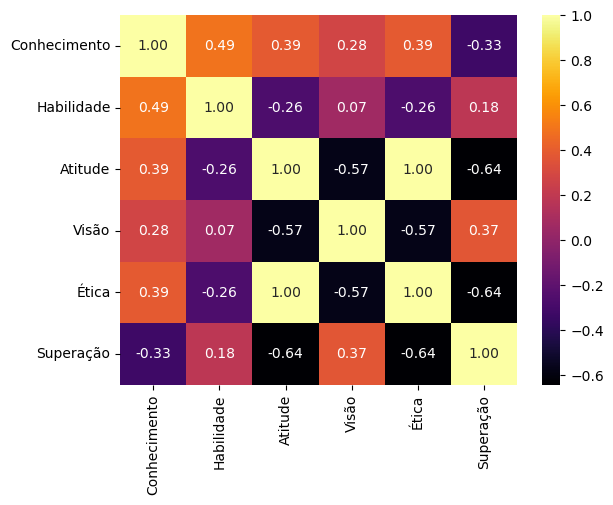

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

# Dados da avaliação
dados = {
    'Pessoas': ['A', 'B', 'C', 'D', 'E'],
    'Conhecimento': [2, 1, 2, 2, 4],
    'Habilidade': [2, 1, 1, 4, 3],
    'Atitude': [4, 3, 2, 1, 4],
    'Visão': [1, 2, 4, 3, 3],
    'Ética': [4, 3, 2, 1, 4],
    'Superação': [2, 4, 3, 4, 3]
}

df = pd.DataFrame(dados)
# Pesos estatísticos
pesos = {
    'Conhecimento': 0.3,
    'Habilidade': 0.25,
    'Atitude': 0.2,
    'Visão': 0.15,
    'Ética': 0.05,
    'Superação': 0.05
}

# Calcular a média de pontuação de cada competência
medias_competencias = {}
for competencia in pesos.keys():
    pontuacoes = dados[competencia]
    media = np.mean(pontuacoes)
    medias_competencias[competencia] = media

# Calcular o desempenho médio geral da equipe
desempenho_geral = np.average([medias_competencias[competencia] for competencia in pesos.keys()], weights=list(pesos.values()))

# Verificar a variabilidade na pontuação em cada competência
variabilidade_competencias = {}
for competencia in pesos.keys():
    pontuacoes = dados[competencia]
    desvio_padrao = np.std(pontuacoes, ddof=1)  # Usando ddof=1 para calcular o desvio padrão amostral
    variabilidade_competencias[competencia] = "Baixa" if desvio_padrao < 0.1 else "Alta"

# Calcular o desempenho médio de cada pessoa da equipe
desempenho_pessoas = {}
for pessoa in dados['Pessoas']:
    desempenho = np.average([dados[competencia][dados['Pessoas'].index(pessoa)] for competencia in pesos.keys()], weights=list(pesos.values()))
    desempenho_pessoas[pessoa] = desempenho

# Criar uma matriz de coeficientes de correlação entre as competências
matriz_correlacao = np.corrcoef([dados[competencia] for competencia in pesos.keys()])

# Mostrar os resultados
print("I. Média de pontuação de cada competência:")
for competencia, media in medias_competencias.items():
    print(f"{competencia}: {media:.2f}")

print("\nII. Desempenho médio geral da equipe na avaliação:")
print(f"Desempenho Geral: {desempenho_geral:.2f}")

print("\nIII. Variabilidade na pontuação em cada competência:")
for competencia, variabilidade in variabilidade_competencias.items():
    print(f"{competencia}: {variabilidade}")

print("\nIV. Desempenho médio de cada pessoa da equipe:")
for pessoa, desempenho in desempenho_pessoas.items():
    print(f"{pessoa}: {desempenho:.2f}")

print("\nV. Matriz de coeficiente de correlação entre as competências:")
print(matriz_correlacao)
  
sns.heatmap(matriz_correlacao, annot=True, fmt=".2f", cmap="inferno", xticklabels=pesos.keys(), yticklabels=pesos.keys())

print(display(df))